In [444]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics.pairwise import linear_kernel , cosine_similarity
import re

In [445]:
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Reading Data

In [446]:
data1 = pd.read_csv(r"tmdb_5000_credits.csv")
data2 = pd.read_csv(r"tmdb_5000_movies.csv")
data1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

## Merging the Datas

In [447]:
data1.columns = ['id', 'title', 'cast', 'crew']

data = data2.merge(data1, on = "id")

In [448]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [449]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### Now we are going to recommondation model such that it will recommend the movies based on the destription(story) of the movie

Data cleaning

In [450]:
stop_words = set(stopwords.words("english"))

def clean_data(text):

    if( isinstance(text,str)):

        text = text.lower()

        test = re.sub("\S*@\S*","",text)         # Removing gmail ids

        text= re.sub("http\S*","",text)          # Removing links

        text = re.sub("\d","",text)              # Removing digits

        text = re.sub("\s[a-zA-Z]\s"," ",text)  # Removing single alphabets

        text = re.sub("\s+[^a-zA-Z]+\s+","",text)    #keeping english letters only

        text = re.sub("\[[^+]*\]","",text)     # Removing squate brackets and the content inside it

        text = re.sub("[#-]+","",text)         # Removing hashtags and -  

        text = re.sub("\n","",text)            # Removing newlines 

        text = re.sub("\s\s+"," ",text)         #removing More then one spaces

        text = word_tokenize(text)

        text = [i for i in text if i not in stop_words and len(i) > 2]  #Removing stopwords and two letter words

        return text
    
    else:
        print(type(text))
        return " "




    

In [451]:
data ["new_overview"]= data["overview"].apply(clean_data)
data = data[data["new_overview"] != " "]

<class 'float'>
<class 'float'>
<class 'float'>


Stemming the data

In [452]:
lemmatizer = WordNetLemmatizer()
def data_stemmer(text):

    
    text = [lemmatizer.lemmatize(i) for i in text]

    return " ".join(text)

In [453]:
data["new_overview"] = data["new_overview"].apply(data_stemmer)

In [454]:
data["old_len"] = data["overview"].apply(len)
data["new_len"] = data["new_overview"].apply(len)

In [455]:
data.loc[:,["old_len","new_len"]].head()

,old_len,new_len
0,175,123
1,176,111
2,240,181
3,428,338
4,342,242


In [456]:
data.reset_index(drop=True,inplace=True)

### Now we are going to convert our data into TFIDFs ###

To know about TFIDF visit this link "https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/"

In [457]:
TFIDS = TfidfVectorizer(stop_words='english')
movie_tfids = TFIDS.fit_transform(data["new_overview"])
movie_tfids

<4800x20692 sparse matrix of type '<class 'numpy.float64'>'
	with 119880 stored elements in Compressed Sparse Row format>

in Movie_tfids each row reprecents each movie and each columns represents each word which is appeared atleast only once .

### Now we are going to calculate the similarity score between the movies(rows)

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

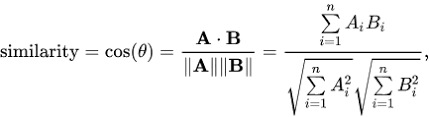

In [458]:
cosine_sim = linear_kernel(movie_tfids,movie_tfids)

Now we are going to make reverse indexing , given a monve name as indes we can get the index of the movie

In [459]:
movie_index  = pd.Series(data.index,index= data["title_x"]).drop_duplicates()


Now we are going to define a function that will return the top 10 similar movies except the movie itself

In [460]:
def get_similar_movies(title , cos_sim = cosine_sim):

    indx = movie_index[title]

    get_similar_movies = list(enumerate(cos_sim[indx]))

    get_similar_movies = sorted(get_similar_movies ,key = lambda x : x[1], reverse=True)

    get_similar_movies = get_similar_movies[1:11]

    movie_indices =  [i for i,j in get_similar_movies]

    return data["title_x"].iloc[movie_indices]




In [461]:
get_similar_movies(title='The Dark Knight Rises')

65                              The Dark Knight
428                              Batman Returns
1359                                     Batman
299                              Batman Forever
3853    Batman: The Dark Knight Returns, Part 2
2507                                  Slow Burn
119                               Batman Begins
9            Batman v Superman: Dawn of Justice
210                              Batman & Robin
1181                                        JFK
Name: title_x, dtype: object

In [462]:
get_similar_movies(title="Pirates of the Caribbean: At World's End")

2542                        What's Love Got to Do with It
3094                                  My Blueberry Nights
109     The Chronicles of Narnia: The Voyage of the Da...
2102                                      The Descendants
1280                                            Disturbia
2708                                           Mr. Turner
792                                      Just Like Heaven
1709                         Space Pirate Captain Harlock
2652                           Bathory: Countess of Blood
1799                                         Original Sin
Name: title_x, dtype: object

In [463]:
movie_index

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4795
Newlyweds                                   4796
Signed, Sealed, Delivered                   4797
Shanghai Calling                            4798
My Date with Drew                           4799
Length: 4800, dtype: int64

### Credits, Genres and Keywords Based Recommender  ###


To know about literal eval https://www.aipython.in/python-literal_eval/

In [464]:
features = ["cast","crew","keywords","genres"]
for feature in features:

    data[feature] = data[feature].apply(literal_eval)

In [465]:
def get_dir(x):

    for i in x:

        if(i["job"].lower() == "director"):

            return i["name"]
    
    return np.nan

In [466]:
data["director"] = data["crew"].apply(get_dir)

In [467]:
def get_list(x):

    if( isinstance(x,list) ):
        names = []
        for i in x[:3]:
            names.append(i["name"])
        return names
    return []


In [468]:
features = ["cast","keywords","genres"]

for feature in features:

    data[feature] = data[feature].apply(get_list)

In [469]:
def clean_data(x):

    if( isinstance(x,list)):

        return [re.sub(" ","",i) for i in x]
    
    elif(isinstance(x,str)):

        return re.sub(" ","",x)
    
    else:
        return ''

In [470]:
features = ["cast","keywords","genres","director"]

for feature in features:

    data[feature] = data[feature].apply(clean_data)

In [471]:
def merge_data(x):

    return x["new_overview"] + " " + x["director"] + " " + " ".join(x["cast"]) +  " "  + " ".join(x["keywords"]) + " " + " ".join(x["genres"])

In [472]:
data["overview_with_crew_and_cast"] = data.apply(merge_data,axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [473]:
vectorrizer = CountVectorizer()

movie_cv = vectorrizer.fit_transform(data["overview_with_crew_and_cast"])

In [474]:
cosine_sim_2 = cosine_similarity(movie_cv,movie_cv)

In [477]:
get_similar_movies('The Dark Knight Rises', cosine_sim_2)

65               The Dark Knight
119                Batman Begins
1359                      Batman
299               Batman Forever
2507                   Slow Burn
4635    Amidst the Devil's Wings
428               Batman Returns
1664               Dead Man Down
210               Batman & Robin
3941         Hobo with a Shotgun
Name: title_x, dtype: object

In [479]:
get_similar_movies('The Godfather', cosine_sim_2)

2730      The Godfather: Part II
867      The Godfather: Part III
1873                  Blood Ties
4635    Amidst the Devil's Wings
1635     The Replacement Killers
444            Road to Perdition
3726                  Easy Money
1105                    Sleepers
3725                  Sexy Beast
3087                  The Iceman
Name: title_x, dtype: object